In [1]:
import db

In [2]:
import coin_repository

In [ ]:
# import coin_strategy

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import math

In [4]:
class GetMddCagr:
    def __init__(self, repository):
        self.repository = repository
    
    def get_mddcagr(self):
        (index, origin) = self.repository.get_data_as_lists()
        data = {}
        new_index = index
        close_series = pd.Series(origin['close'], new_index)
        data['ma5'] = close_series.rolling(window=5).mean()
        data['ma20'] = close_series.rolling(window=20).mean()
        # df = pd.DataFrame(data, new_index)
        # df.plot()
        previous_ma5 = -1
        previous_ma20 = -1
        previous_close = -1
        benefits = []
        drawdowns = []
        bought = False
        max_benefit = -1

        for tuple in zip(data['ma5'], data['ma20'], origin['close'], index):
            if tuple[0] > tuple[1] and previous_ma5 <= previous_ma20:
#                 print(f"golden cross: {tuple}")
                bought = True
                if len(benefits) == 0:
                    benefits.append(1)
                else:
                    benefits.append(benefits[-1])
            elif tuple[0] < tuple[1] and previous_ma5 >= previous_ma20:
#                 print(f"dead cross: {tuple}")
                bought = False
                benefits.append(benefits[-1] * (tuple[2] / previous_close))
            else:
                if len(benefits) == 0:
                    benefits.append(1)
                elif bought:
                    benefits.append(benefits[-1] * (tuple[2] / previous_close))
                else:
                    benefits.append(benefits[-1])

            if (benefits[-1] > max_benefit):
                max_benefit = benefits[-1]

            drawdowns.append(1 - (benefits[-1] / max_benefit))

            previous_ma5 = tuple[0]
            previous_ma20 = tuple[1]
            previous_close = tuple[2]

        df = pd.Series(benefits, index)
        df.plot()

        print(f"MDD: {max(drawdowns) * 100}%")
        print(f"CAGR: {(benefits[-1] - 1) * 100}%")

MDD: 46.912997264890386%
CAGR: 247.65565447263734%


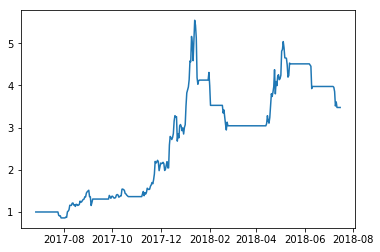

In [5]:
a = GetMddCagr(coin_repository.CoinRepository('ETH'))
a.get_mddcagr()

MDD: 51.90940771904431%
CAGR: 86.16059989226036%


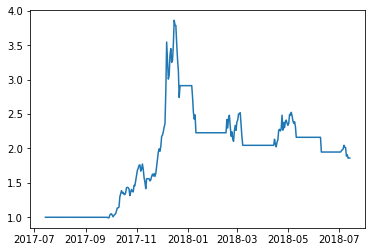

In [6]:
a = GetMddCagr(coin_repository.CoinRepository('BTC'))
a.get_mddcagr()

MDD: 44.813939219854085%
CAGR: 434.5398735961728%


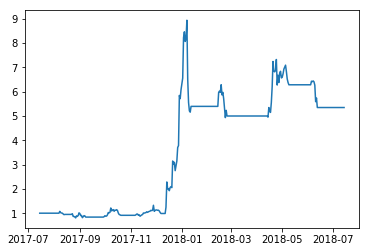

In [7]:
a = GetMddCagr(coin_repository.CoinRepository('XRP'))
a.get_mddcagr()

In [80]:
class GetDataFrame:
    def __init__(self, repository):
        self.repository = repository

    def get_ma_and_close_chart(self):
        origin = self.repository.get_data()
        close_prices = {}
        five_days = []
        twenty_days = []
        ma5 = {}
        ma20 = {}

        count = 0

        for x in origin['close']:
            count +=1
            if count > 100:
                break
            close_price = origin['close'][x]
            close_prices[x] = close_price
            five_days.append(close_price)
            if len(five_days) < 5:
                continue
            if len(five_days) == 6:
                five_days.pop(0)
            average_5 = sum(five_days) / len(five_days)
            ma5[x] = average_5

        count = 0

        for x in origin['close']:
            count += 1
            if count > 100:
                break
            close_price = origin['close'][x]
            twenty_days.append(close_price)

            if len(twenty_days) < 20:
                continue
            if len(twenty_days) == 21:
                twenty_days.pop(0)
            average_20 = sum(twenty_days) / len(twenty_days)
            ma20[x] = average_20

        data = {
            'close': close_prices,
            'ma5': ma5,
            'ma20': ma20
        }
        df = pd.DataFrame(data)
        df.plot()
        
    def get_ma_chart(self):
        (index, origin) = self.repository.get_data_as_lists()
        data = {}
        new_index = index
        close_series = pd.Series(origin['close'], new_index)
        data['ma5'] = close_series.rolling(window=5).mean()
        data['ma20'] = close_series.rolling(window=20).mean()
        # data['close'] = close_series
        df = pd.DataFrame(data, new_index)
        df.plot()
    
    def get_ma_and_acc_chart(self):    
        (index, origin) = coin_repository.CoinRepository('BTC').get_data_as_lists()
        data = {}
        new_index = index
        close_series = pd.Series(origin['close'], new_index)
        data['no_loss'] =  0
        data['ma5'] = close_series.rolling(window=5).mean()
        data['ma20'] = close_series.rolling(window=20).mean()
        data['ma5-ma20'] = data['ma5'] - data['ma20']
        data['acc'] = []
        for v in data['ma5-ma20']:
            if math.isnan(v) or len(data['acc']) == 0 or math.isnan(data['acc'][-1]):
                data['acc'].append(v)
            else:
                data['acc'].append(v + data['acc'][-1])

        df = pd.DataFrame(data, new_index)
        df.plot()
    
    def get_ohlc_chart(self):
        df = pd.DataFrame(coin_repository.CoinRepository('BTC').get_data())
        df.plot()
        
    def get_hlc_chart(self):
        origin = coin_repository.CoinRepository('BTC').get_data()
        data = {
            'high': origin['high'],
            'low' : origin['low']
        }
        middle = {}

        for x in data['high']:
            middle[x] = (data['high'][x] + data['low'][x]) / 2
        data['middle'] = middle

        df = pd.DataFrame(data)
        df.plot()

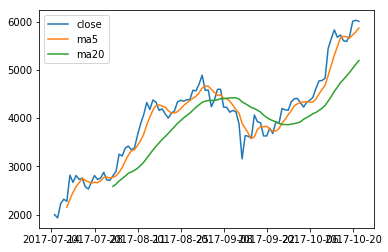

In [81]:
b = GetDataFrame(coin_repository.CoinRepository('BTC'))
b.get_ma_and_close_chart()

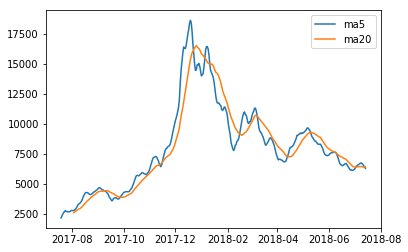

In [82]:
b = GetDataFrame(coin_repository.CoinRepository('BTC'))
b.get_ma_chart()

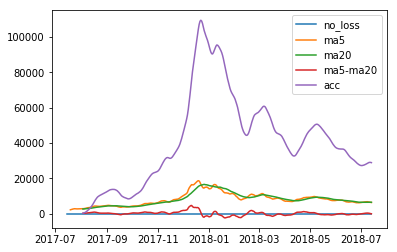

In [83]:
b = GetDataFrame(coin_repository.CoinRepository('BTC'))
b.get_ma_and_acc_chart()

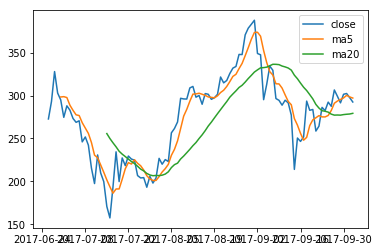

In [84]:
b = GetDataFrame(coin_repository.CoinRepository('ETH'))
b.get_ma_and_close_chart()

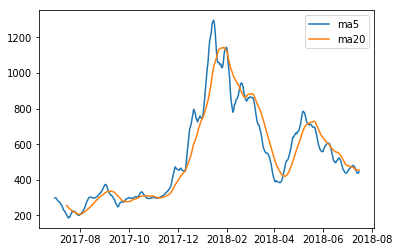

In [85]:
b = GetDataFrame(coin_repository.CoinRepository('ETH'))
b.get_ma_chart()

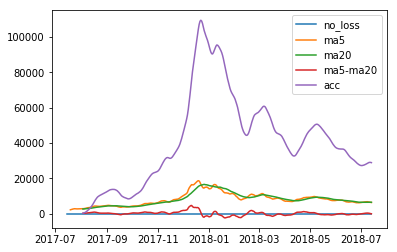

In [86]:
b = GetDataFrame(coin_repository.CoinRepository('ETH'))
b.get_ma_and_acc_chart()

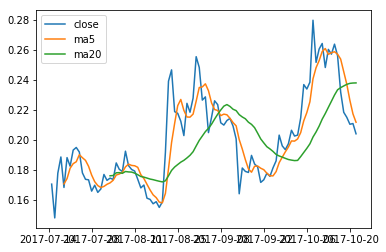

In [87]:
b = GetDataFrame(coin_repository.CoinRepository('XRP'))
b.get_ma_and_close_chart()

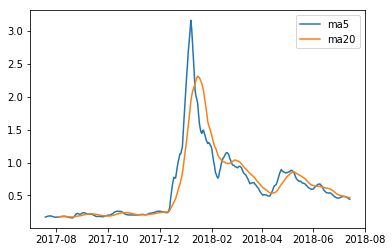

In [88]:
b = GetDataFrame(coin_repository.CoinRepository('XRP'))
b.get_ma_chart()

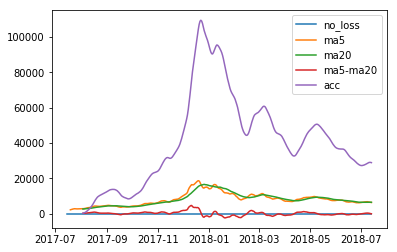

In [89]:
b = GetDataFrame(coin_repository.CoinRepository('XRP'))
b.get_ma_and_acc_chart()

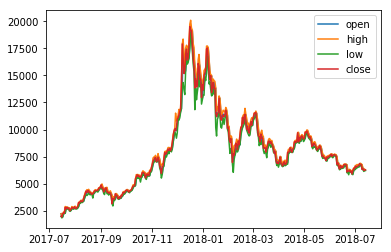

In [93]:
b = GetDataFrame(coin_repository.CoinRepository('BTC'))
b.get_ohlc_chart()

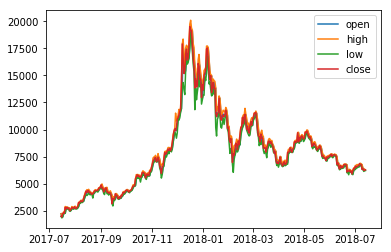

In [94]:
b = GetDataFrame(coin_repository.CoinRepository('ETH'))
b.get_ohlc_chart()

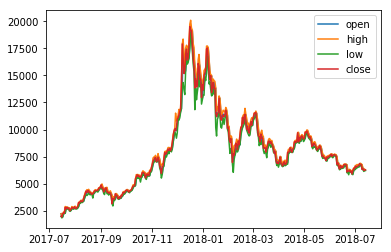

In [95]:
b = GetDataFrame(coin_repository.CoinRepository('XRP'))
b.get_ohlc_chart()

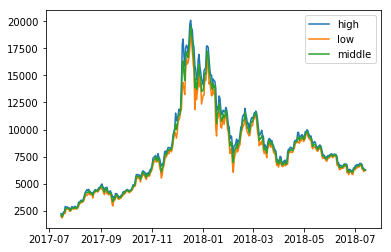

In [96]:
b = GetDataFrame(coin_repository.CoinRepository('BTC'))
b.get_hlc_chart()

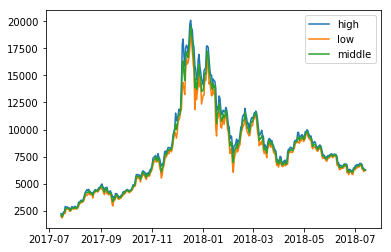

In [97]:
b = GetDataFrame(coin_repository.CoinRepository('ETH'))
b.get_hlc_chart()

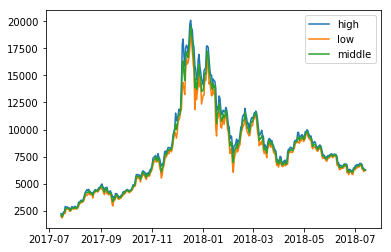

In [98]:
b = GetDataFrame(coin_repository.CoinRepository('XRP'))
b.get_hlc_chart()